##Nama : Syifa Apriyani
##NIM : 210401010048
##Mata Kuliah : Pengolahan Citra Digital
##Kelas : IFD51
###1. Buatlah program python dengan memanfaatkan imageio, numpy dan matplotlib untuk mengimplementasikan konsep deteksi tepi dengan menggunakan model Robert, kemudian bandingkan hasilnya dengan operator Sobel, lakukan analisa. Kumpulkan link github untuk kode program beserta analisanya

In [7]:
# import library
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [10]:
# do with operator sobel
def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    edge_x = convolve(image, sobel_x)
    edge_y = convolve(image, sobel_y)

    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    return edge_magnitude.astype(np.uint8)

In [9]:
# do with operator robert
def roberts_operator(image):
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])

    edge_x = convolve(image, roberts_x)
    edge_y = convolve(image, roberts_y)

    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    return edge_magnitude.astype(np.uint8)

In [12]:
# input image
image = imageio.imread("/content/lion.jpg", mode='L')

roberts_edges = roberts_operator(image)
sobel_edges = sobel_operator(image)

<ipython-input-12-c299e7c827c7>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("/content/lion.jpg", mode='L')


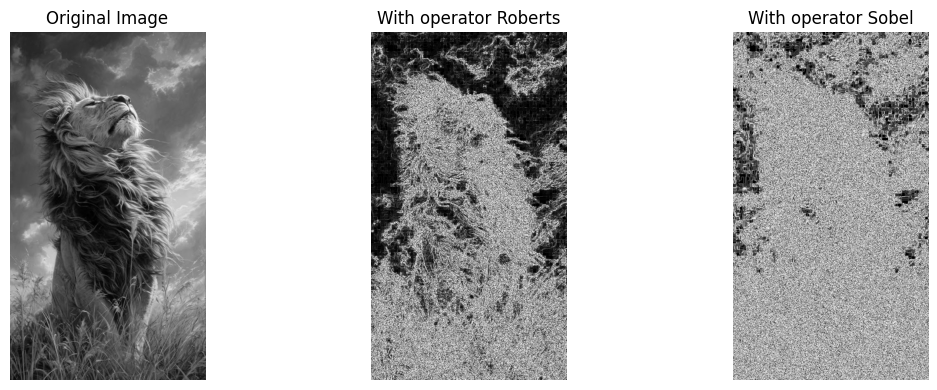

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(roberts_edges, cmap='gray')
axes[1].set_title("With operator Roberts")
axes[1].axis("off")

axes[2].imshow(sobel_edges, cmap='gray')
axes[2].set_title("With operator Sobel")
axes[2].axis("off")

plt.tight_layout()
plt.show()

### Fungsi operator Roberts menggunakan kernel 2x2 untuk mendeteksi tepi dan menggunakan convolve dari scipy.ndimage untuk menerapkan filter.

###Fungsi operator Sobel menggunakan kernel 3x3 dan menggunakan convolve untuk menghitung besaran gradien.

### Dari hasil menunjukan bahwa operator Roberts lebih sederhana sehingga memberikan tepi yang lebih kasar, sedangkan operator Sobel lebih halus karena menggunakan filter yang lebih besar.